In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
iris = load_iris(as_frame=True)
iris.frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
from sklearn.model_selection import train_test_split
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=123)

In [4]:
from tensorflow.keras.utils import to_categorical
# Create categorical labels
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)

In [5]:
from tensorflow import keras
# Import Keras modules
from keras import models
from keras import layers


# Create the network
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(4,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(3, activation='softmax'))

# Compile the network
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.save_weights('model.h5')

In [6]:
model.load_weights('model.h5')
model_history = model.fit(X_train, train_labels, epochs=50, batch_size=1, verbose=1)

Epoch 1/50
90/90 [==============================] - 0s 641us/step - loss: 0.8782 - accuracy: 0.7111
Epoch 2/50
90/90 [==============================] - 0s 686us/step - loss: 0.5743 - accuracy: 0.7889
Epoch 3/50
90/90 [==============================] - 0s 540us/step - loss: 0.4443 - accuracy: 0.8444
Epoch 4/50
90/90 [==============================] - 0s 540us/step - loss: 0.3634 - accuracy: 0.8889
Epoch 5/50
90/90 [==============================] - 0s 540us/step - loss: 0.2883 - accuracy: 0.9111
Epoch 6/50
90/90 [==============================] - 0s 574us/step - loss: 0.2506 - accuracy: 0.9000
Epoch 7/50
90/90 [==============================] - 0s 630us/step - loss: 0.2056 - accuracy: 0.9444
Epoch 8/50
90/90 [==============================] - 0s 641us/step - loss: 0.1990 - accuracy: 0.9333
Epoch 9/50
90/90 [==============================] - 0s 675us/step - loss: 0.1669 - accuracy: 0.9333
Epoch 10/50
90/90 [==============================] - 0s 709us/step - loss: 0.1357 - accuracy: 0.9444

Text(0, 0.5, 'Loss')

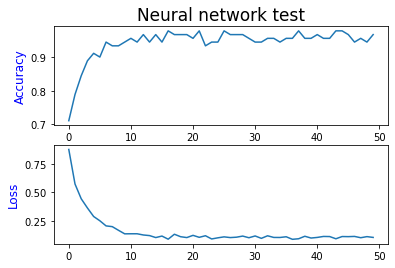

In [7]:
plt.figure()
plt.subplot(211)
plt.title('Neural network test', fontsize=17)
plt.plot(model_history.history['accuracy'])
plt.xlabel('Epoch', fontsize=12, color='blue')
plt.ylabel('Accuracy', fontsize=12, color='blue')
plt.subplot(212)
plt.plot(model_history.history['loss'])
plt.ylabel('Loss', fontsize=12, color='blue')

In [8]:
# Get the accuracy of test data set
test_loss, test_acc = model.evaluate(X_test, test_labels)
# Print the test accuracy
print('Test Accuracy: ', test_acc, '\nTest Loss: ', test_loss)

2/2 [==============================] - 0s 2ms/step - loss: 0.1139 - accuracy: 0.9167
Test Accuracy:  0.9166666865348816 
Test Loss:  0.11385766416788101
